In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [ ]:
data=load_breast_cancer()
breast_cancer=pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
#just use onlly 2 features for demonstration
breast_cancer=breast_cancer.loc[:,["mean radius","mean compactness"]]

In [ ]:
display(breast_cancer)

,mean radius,mean compactness
0,17.99,0.27760
1,20.57,0.07864
2,19.69,0.15990
3,11.42,0.28390
4,20.29,0.13280
...,...,...
564,21.56,0.11590
565,20.13,0.10340
566,16.60,0.10230
567,20.60,0.27700


In [ ]:
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt


In [ ]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
x=StandardScaler().fit_transform(breast_cancer)

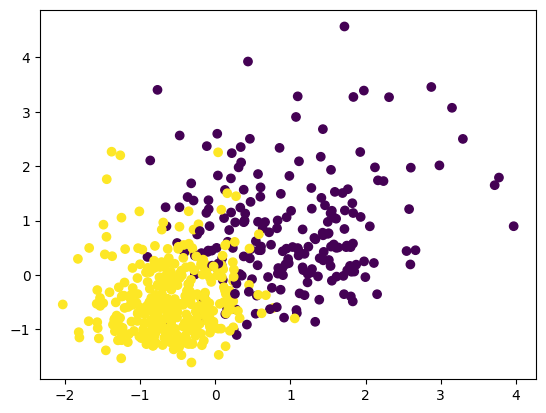

In [ ]:
plt.scatter(x[:,0],x[:,1],c=data.target)

In [ ]:
#using adaboosting
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
#set different boost times to see the result
models=[]

In [ ]:
boost_times=[50,100,500,1000]
for times in boost_times:
  model=AdaBoostClassifier(n_estimators=times,random_state=1).fit(x,data.target)
  models.append(model)

In [ ]:
model

AdaBoostClassifier(n_estimators=1000, random_state=1)

In [ ]:
import numpy as np
#plot the decision boundary
#get the grid value
x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
y_min,y_max=x[:,0].min()-1,x[:,0].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))

<ipython-input-24-075f1e66e6fa>:9: UserWarning: The following kwargs were not used by contour: 'emap'
  cs=plt.contourf(xx,yy,z,emap=plt.cm.Paired)
<ipython-input-24-075f1e66e6fa>:9: UserWarning: The following kwargs were not used by contour: 'emap'
  cs=plt.contourf(xx,yy,z,emap=plt.cm.Paired)
<ipython-input-24-075f1e66e6fa>:9: UserWarning: The following kwargs were not used by contour: 'emap'
  cs=plt.contourf(xx,yy,z,emap=plt.cm.Paired)
<ipython-input-24-075f1e66e6fa>:9: UserWarning: The following kwargs were not used by contour: 'emap'
  cs=plt.contourf(xx,yy,z,emap=plt.cm.Paired)


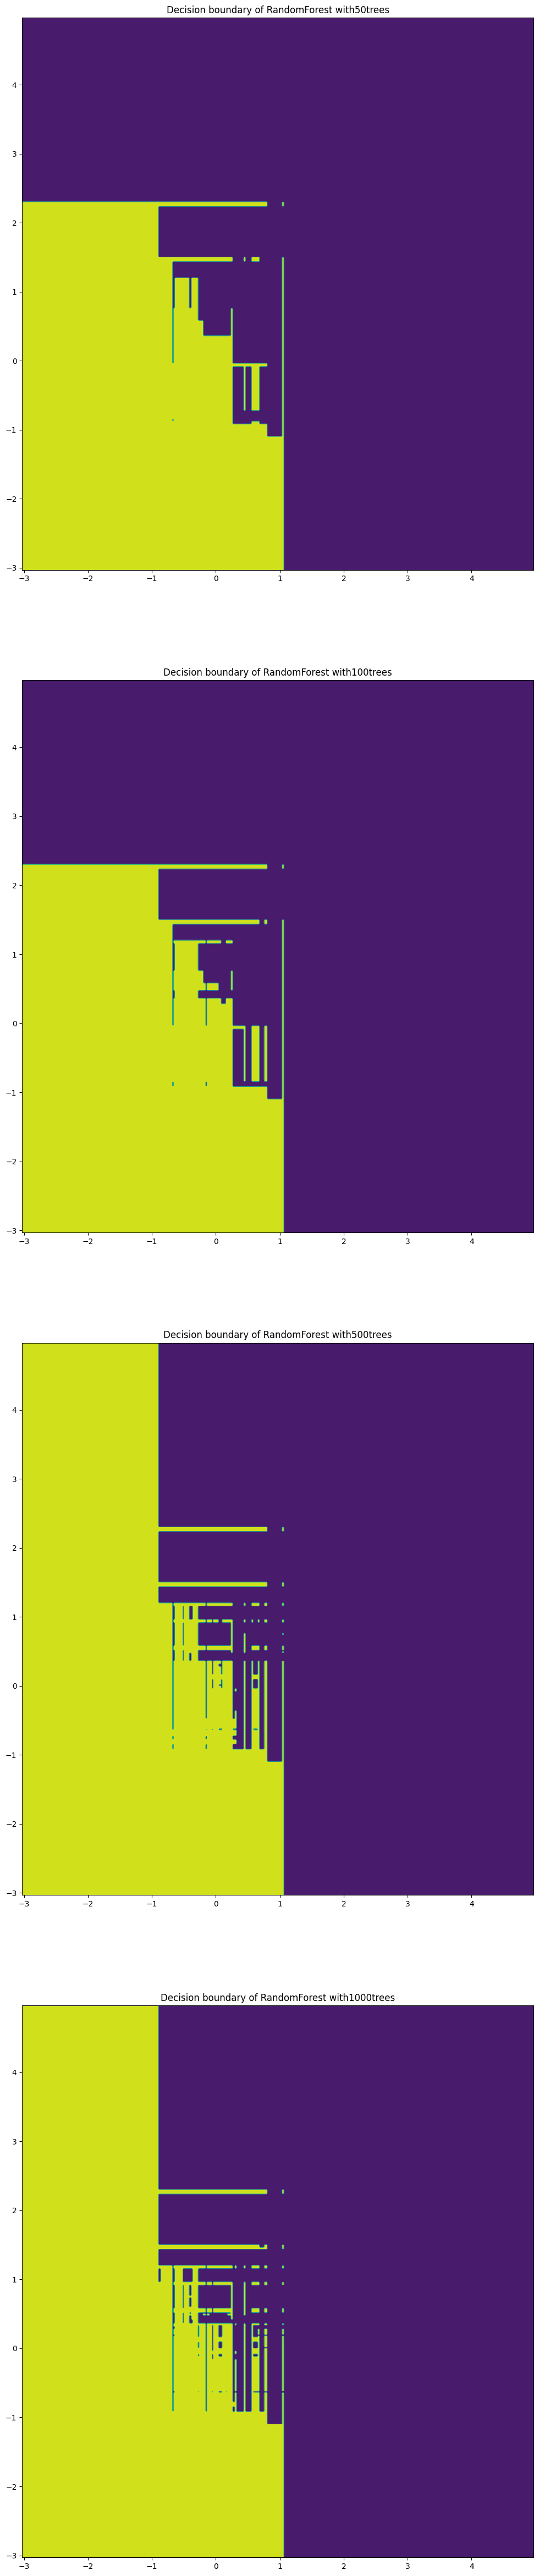

In [ ]:
#plot the figure
plt.figure(figsize=(12,60))
for index,model in enumerate(models):
  plt.subplot(len(models),1,index+1)
  z=model.predict(np.c_[xx.ravel(),yy.ravel()])
  z=z.reshape(xx.shape)
  plt.title(f"Decision boundary of RandomForest with{boost_times[index]}trees")
  #plot contour with color filled
  cs=plt.contourf(xx,yy,z,emap=plt.cm.Paired)


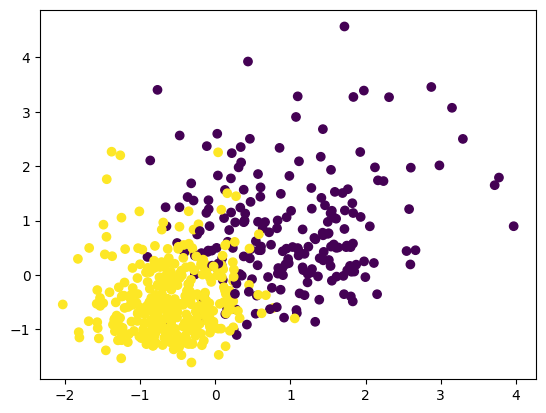

In [ ]:
#plot training data
plt.scatter(x[:,0],x[:,1],c=data.target)

In [ ]:
#gradient boosting
#using gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
#set difference boost times to see the result
models=[]

In [ ]:
boost_times=[100,200,500,3000]
for times in boost_times:
  model=GradientBoostingClassifier(n_estimators=times,random_state=1).fit(x,data.target)
  models.append(model)

In [ ]:
#plot the decision boundary
#get the grid value
x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
y_min,y_max=x[:,0].min()-1,x[:,0].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))

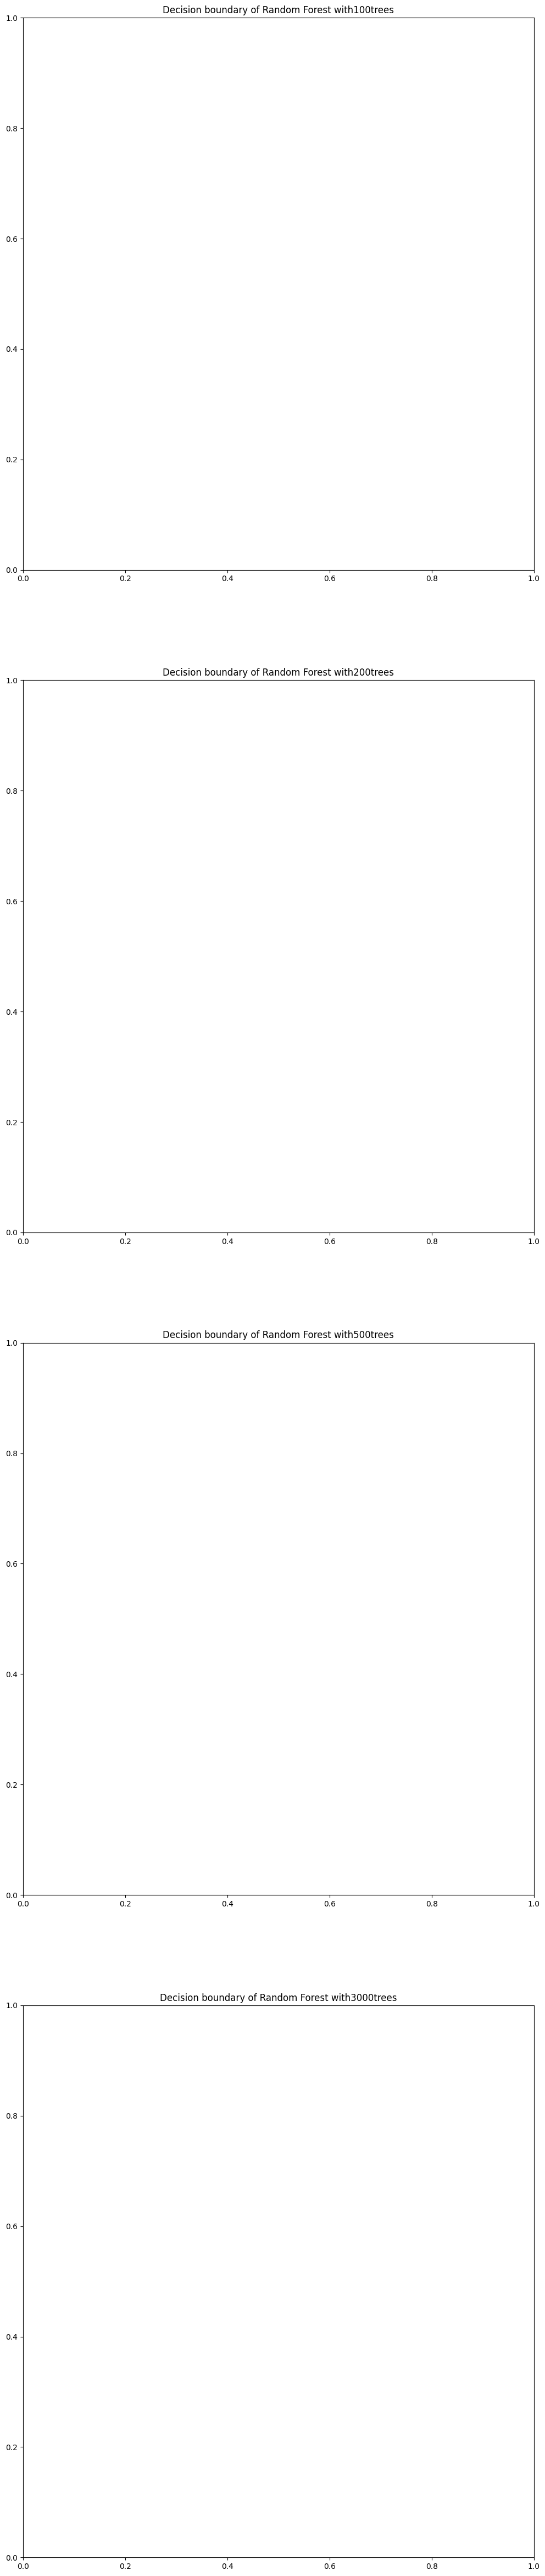

In [ ]:
plt.figure(figsize=(12,60))
for index,model in enumerate(models):
  plt.subplot(len(models),1,index+1)
  z=model.predict(np.c_[xx.ravel(),yy.ravel()])
  z=z.reshape(xx.shape)
  plt.title(f"Decision boundary of Random Forest with{boost_times[index]}trees")

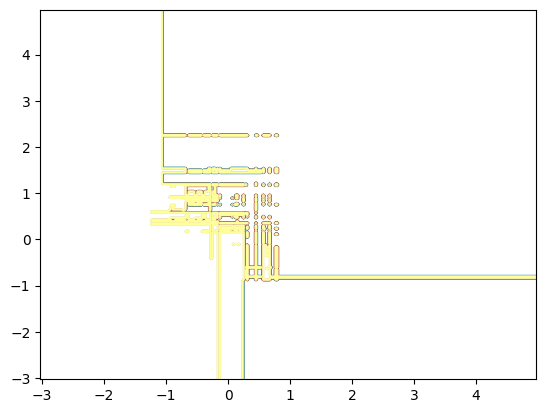

In [ ]:
#plot contour with color filled
cs=plt.contour(xx,yy,z,cmap=plt.cm.Paired)

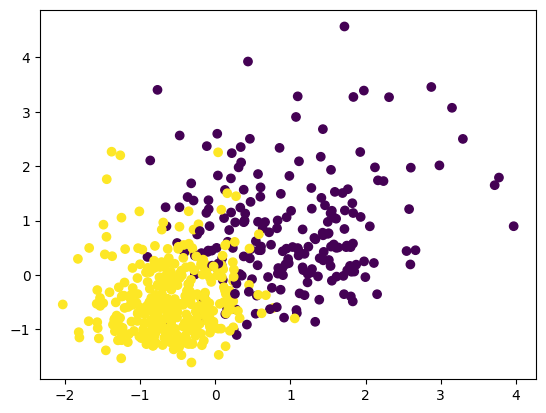

In [ ]:
#plot training data
plt.scatter(x[:,0],x[:,1],c=data.target)